In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def PCA(X, n_components):
    # mean centering of the data, axis = 0 implies finding mean on the columns
    X_meaned = X - np.mean(X, axis = 0)
    
    # get the covariance matrix
    covariance_matrix = np.cov(X_meaned, rowvar = False)
    
    # get the eigen values and the eigen vectors 
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    print("The eigen values are : ", eigen_values)
    print("The eigen vectors are : \n", eigen_vectors)
    
    # arranging the eigen_values and eigen_vectors in the descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    print("The sorted_index is as follows : ", sorted_index)
    
    sorted_eigen_values = eigen_values[sorted_index]
    sorted_eigen_vectors = eigen_vectors[:, sorted_index]
    print("The sorted eigen values are now as follows : ", sorted_eigen_values)
    print("The sorted eigen vectors are now as follows : \n", sorted_eigen_vectors)
    
    # as 'n' is mentioned, we now take only the first 'n' significant principal components 
    selected_eigen_vectors = sorted_eigen_vectors[:, 0:n_components]
    print("The Principal components are as follows : ", selected_eigen_vectors)
    
    # transforming the original dataset to get the reduced dataset
    transformed_dataset = np.dot(X, selected_eigen_vectors)
    
    return transformed_dataset


The eigen values are :  [0.02384304 0.07905128 0.24314579 4.20438706]
The eigen vectors are : 
 [[ 0.3172613   0.58115529  0.6558202  -0.36263433]
 [-0.32408808 -0.59619427  0.73001455  0.08122848]
 [-0.47972477 -0.07265649 -0.17703033 -0.85629752]
 [ 0.75111672 -0.54911925 -0.07509244 -0.35868209]]
The sorted_index is as follows :  [3 2 1 0]
The sorted eigen values are now as follows :  [4.20438706 0.24314579 0.07905128 0.02384304]
The sorted eigen vectors are now as follows : 
 [[-0.36263433  0.6558202   0.58115529  0.3172613 ]
 [ 0.08122848  0.73001455 -0.59619427 -0.32408808]
 [-0.85629752 -0.17703033 -0.07265649 -0.47972477]
 [-0.35868209 -0.07509244 -0.54911925  0.75111672]]
The Principal components are as follows :  [[-0.36263433  0.6558202 ]
 [ 0.08122848  0.73001455]
 [-0.85629752 -0.17703033]
 [-0.35868209 -0.07509244]]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

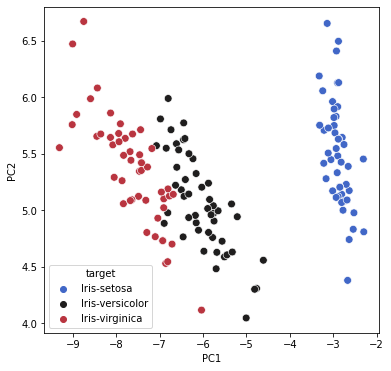

In [12]:
df = pd.read_csv('iris.csv')
# print(df)
df.columns = ['sepal length','sepal width','petal length','petal width','target']

# creating dataset
X = df.iloc[:, 0:4]
# print(X)

# selecting target attribute
target = df.iloc[:, 4]
# print(target)

# obtaining the transformed dataset
n_components = 2
X_transformed = PCA(X, n_components)

# creating a dataframe of the transformed dataset
principal_df = pd.DataFrame(X_transformed, columns = ['PC1', 'PC2'])
# principal_df.head()


# combining the princiapl_df with the target class column and forming a df
principal_df = pd.concat([principal_df, pd.DataFrame(target)], axis = 1)
principal_df.head()


plt.figure(figsize = (6, 6))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')